In [1]:
# necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')  # reading the data files

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()   # prnting the summary of dataframes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum()    # finding the count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

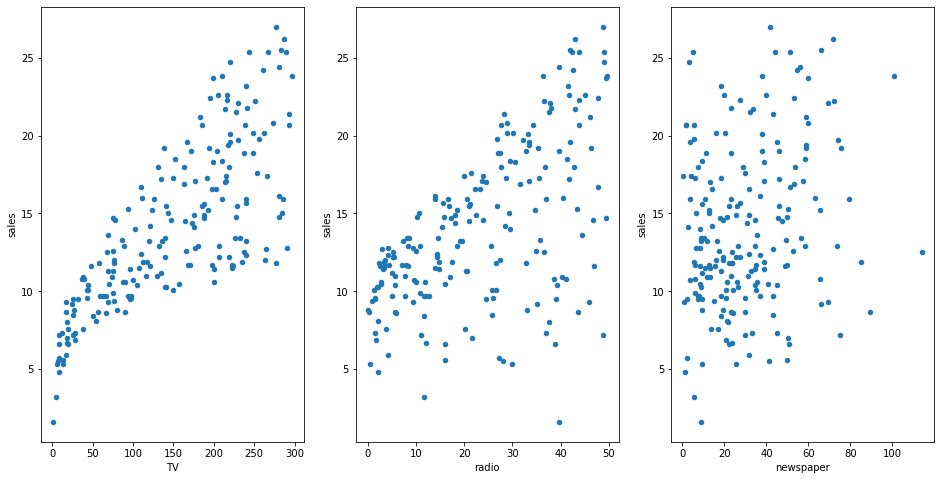

In [7]:
# visualise the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1,3)

data.plot(kind = 'scatter',x = 'TV',y = 'sales', ax =axs[0], figsize = (16,8))
data.plot(kind = 'scatter',x = 'radio',y = 'sales',ax=axs[1])
data.plot(kind = 'scatter',x = 'newspaper',y = 'sales',ax=axs[2]) 
fig.savefig('testdata.jpg')

In [8]:
# create x = features and y = lables
X = data[['TV']]
y = data['sales']


# follow the usual sklearn pattern: import , instantiate, fit
from sklearn.linear_model import LinearRegression   # sklearn is scikit learn
    
lm = LinearRegression()
    
lm.fit(X,y)

LinearRegression()

In [10]:
 # print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.0325935491276965
[0.04753664]


In [11]:
# calculate the prediction
7.032594 + 0.047537*50

9.409444

In [12]:
# Let's creat a data frame since the data expects it
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [13]:
# use the model to make prediction on a new value
lm.predict(X_new)

array([9.40942557])

In [14]:
# create the dataframe with the min and max value of tv
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [15]:
# make predictions for those x values and store then
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

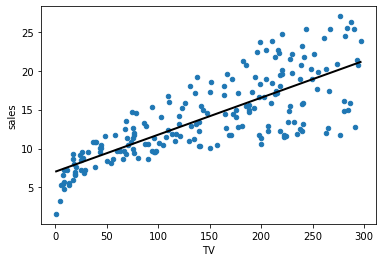

In [16]:
# first plot the observed data
data.plot(kind='scatter',x= 'TV',y='sales')

# then plot the least square line
plt.plot(X_new,preds,c='black',linewidth=2)

In [17]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales~TV',data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [18]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [19]:
lm.rsquared

0.611875050850071

In [20]:
#to create x and y
x = data[['TV','radio','newspaper']]
y = data.sales

lm = LinearRegression()
lm.fit(x,y)

# print intercept and coefficients
print('intercept : ->',lm.intercept_)
print('TV :        ->',lm.coef_[0])
print('Radio :     ->',lm.coef_[1])
print('Newspaper : ->',lm.coef_[2])

intercept : -> 2.9388893694594085
TV :        -> 0.04576464545539759
Radio :     -> 0.1885300169182046
Newspaper : -> -0.0010374930424762452


In [21]:
lm = smf.ols(formula='sales~TV + radio + newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        12:18:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# only include tv and radio in the model
lm = smf.ols(formula='sales~TV + radio',data=data).fit()
lm.rsquared

0.8971942610828957

In [23]:
# add news paper to the model(which we believe has no association with sales)
lm = smf.ols(formula='sales~TV + radio + newspaper',data=data).fit()
lm.rsquared

0.8972106381789522